# Update version of Methadology of process of comparative asset class

In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

Fetching data 

In [2]:
def fetch_data(assets, start_date, end_date):
    data = {}
    for asset, ticker in assets.items():
        data[asset] = yf.download(ticker, start=start_date, end=end_date)
    return data

In [3]:
def get_adjusted_closing_prices(data):
    prices = pd.DataFrame({asset: data[asset]['Adj Close'] for asset in data})
    prices.dropna(inplace=True)
    return prices

In [4]:
def add_most_recent_prices(prices):
    most_recent_date = prices.index.max()
    most_recent_prices = prices.loc[most_recent_date]
    most_recent_prices_df = pd.DataFrame(most_recent_prices).T
    most_recent_prices_df.index = [most_recent_date]
    historical_data_with_recent = pd.concat([prices, most_recent_prices_df])
    return historical_data_with_recent

Calculate the performance metrics

In [5]:
def calculate_performance_metrics(prices):
    daily_returns = prices.pct_change().dropna()
    mean_returns = daily_returns.mean() * 252  # Annualized mean return
    volatility = daily_returns.std() * (252 ** 0.5)  # Annualized volatility
    sharpe_ratio = mean_returns / volatility  # Sharpe Ratio
    
    performance_metrics = pd.DataFrame({
        'Mean Return (%)': mean_returns * 100,
        'Volatility (%)': volatility * 100,
        'Sharpe Ratio': sharpe_ratio
    })
    return performance_metrics

Calculate total returns

In [6]:
def calculate_total_returns(prices):
    initial_prices = prices.iloc[0]
    final_prices = prices.iloc[-1]
    total_returns = (final_prices - initial_prices) / initial_prices * 100
    total_returns_df = pd.DataFrame(total_returns, columns=['Total Return (%)'])
    return total_returns_df

In [7]:
def plot_cumulative_returns(cumulative_returns):
    plt.figure(figsize=(14, 7))
    for asset in cumulative_returns.columns:
        plt.plot(cumulative_returns.index, cumulative_returns[asset], label=asset)
    plt.legend()
    plt.title('Cumulative Returns of Gold, S&P 500, 10Y Treasury, and Bitcoin')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.show()

Plot the performance  graph

In [8]:
def plot_performance_metrics(performance_metrics):
    plt.figure(figsize=(14, 7))
    sns.barplot(x=performance_metrics.index, y='Sharpe Ratio', data=performance_metrics)
    plt.title('Sharpe Ratios of Gold, S&P 500, 10Y Treasury, and Bitcoin')
    plt.show()

In [9]:
def create_cumulative_returns_plot(cumulative_returns):
    cumulative_fig = go.Figure()
    for asset in cumulative_returns.columns:
        cumulative_fig.add_trace(go.Scatter(x=cumulative_returns.index, y=cumulative_returns[asset], mode='lines', name=asset))
    cumulative_fig.update_layout(title='Cumulative Returns of Gold, S&P 500, 10Y Treasury, and Bitcoin', xaxis_title='Date', yaxis_title='Cumulative Return')
    return cumulative_fig

In [10]:

def create_performance_metrics_plot(performance_metrics, num_years):
    performance_fig = go.Figure()
    for metric in performance_metrics.columns:
        performance_fig.add_trace(go.Bar(x=performance_metrics.index, y=performance_metrics[metric], name=metric))
    performance_fig.update_layout(
        title=f'Performance Metrics of Gold, S&P 500, 10Y Treasury, and Bitcoin over {num_years:.1f} Years',
        xaxis_title='Asset',
        yaxis_title='Value',
        barmode='group'
    )
    return performance_fig

In [11]:

def plot_total_returns(total_returns_df):
    total_returns_fig = px.bar(total_returns_df, x=total_returns_df.index, y='Total Return (%)', title='Total Returns')
    total_returns_fig.update_layout(template='plotly_dark')
    return total_returns_fig


Define the assets

In [12]:
# Define the assets
assets = {
    'Gold': 'GC=F',
    'S&P 500': '^GSPC',
    '10Y Treasury': '^TNX',
    'Bitcoin': 'BTC-USD'
}

### The time frame used for analaysis

* 2014-07-01
* 2023-07-01

In [13]:
# Define the start date and end date
start_date = '2014-07-01' #<------ you can change the start date 
end_date = datetime.today().strftime('%Y-%m-%d')

# Fetch and process data
data = fetch_data(assets, start_date, end_date)
prices = get_adjusted_closing_prices(data)
historical_data_with_recent = add_most_recent_prices(prices)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


## Results

In [14]:
# Print the historical data with most recent adjusted closing prices
print("Historical Data with Most Recent Adjusted Closing Prices:")
historical_data_with_recent.tail(6)

Historical Data with Most Recent Adjusted Closing Prices:


,Gold,S&P 500,10Y Treasury,Bitcoin
2024-07-02,2323.000000,5509.009766,4.436,62029.015625
2024-07-03,2359.800049,5537.020020,4.355,60173.921875
2024-07-05,2388.500000,5567.189941,4.272,56662.375000
2024-07-08,2355.199951,5572.850098,4.269,56705.097656
2024-07-09,2360.100098,5576.979980,4.300,58009.226562
2024-07-09,2360.100098,5576.979980,4.300,58009.226562


In [15]:
# Calculate and print total returns
total_returns_df = calculate_total_returns(prices)
print("\nTotal Returns:")
total_returns_df


Total Returns:


,Total Return (%)
Gold,91.194107
S&P 500,178.630282
10Y Treasury,65.384629
Bitcoin,12584.214310


In [16]:
# Calculate and print performance metrics
performance_metrics = calculate_performance_metrics(prices)
print("\nPerformance Metrics:")
performance_metrics


Performance Metrics:


,Mean Return (%),Volatility (%),Sharpe Ratio
Gold,7.711454,14.715171,0.524048
S&P 500,12.087311,17.880184,0.676017
10Y Treasury,17.484506,50.236584,0.348043
Bitcoin,73.766044,69.348495,1.063701


In [17]:
# Create and show plots
num_years = (datetime.strptime(end_date, '%Y-%m-%d') - datetime.strptime(start_date, '%Y-%m-%d')).days / 365.25

# Example cumulative_returns and performance_metrics dataframes for plotting
# Replace these with your actual data
cumulative_returns = prices.pct_change().add(1).cumprod().sub(1) * 100  # Example calculation

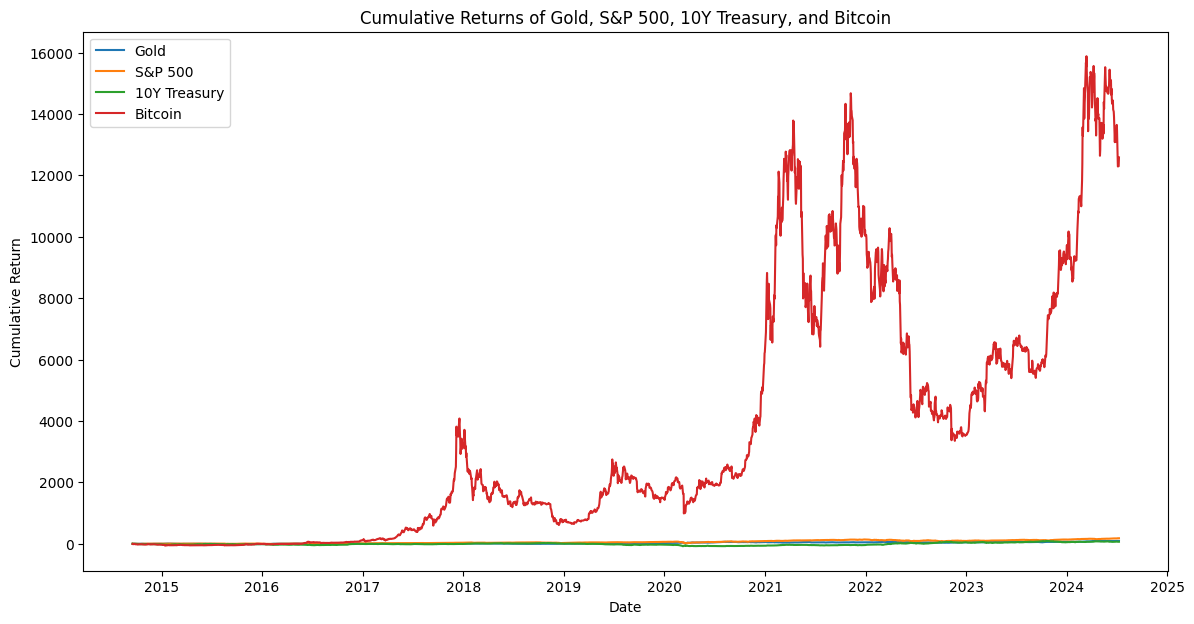

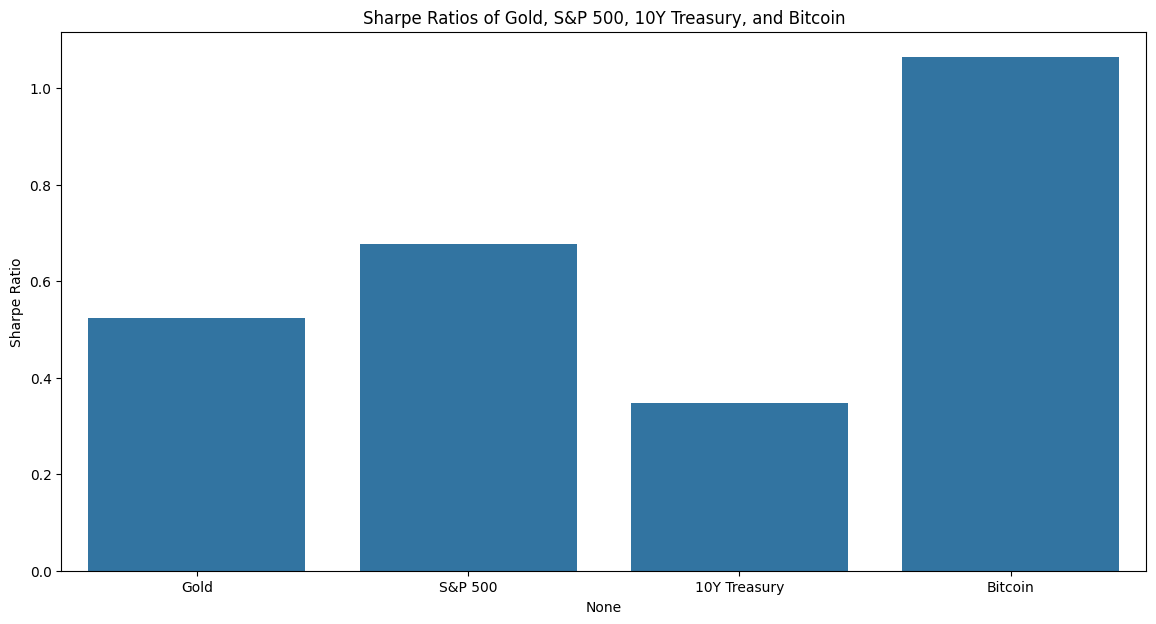

In [18]:
plot_cumulative_returns(cumulative_returns)
plot_performance_metrics(performance_metrics)

cumulative_fig = create_cumulative_returns_plot(cumulative_returns)
performance_fig = create_performance_metrics_plot(performance_metrics, num_years)

In [19]:
# Show the plot
cumulative_fig.show()
performance_fig.show()

total_returns_fig = plot_total_returns(total_returns_df)
total_returns_fig.show()